In [1]:
import numpy as np  
import pandas as pd   
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
 

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy - Was a great learning resource - I am outlining this notebook and using it as practice and also adding some practice code, ex) practicing out some graphs, modeling etc. amazing amazing resource, cant recommend it enough.

* Overview of our Data

In [2]:
train_df.info()
print('')

train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe( include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* Correct Data - ex) Fix outliers ..
* Complete Data - ex) Impute missing data..
* Create Data - ex) Feature engineering
* Converting Data 
    * Deal with formatting
    * Note that categorical data is imported as objects - making it difficult for mathematical calculations
    * On this dataset - we should convert object datatypes to categorical dummy variables

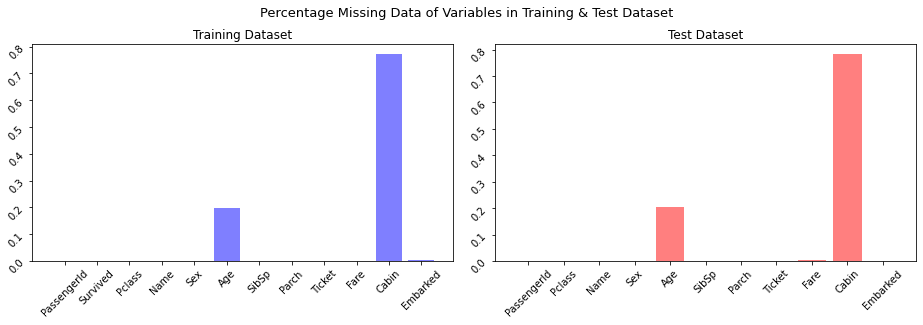

In [4]:

train_missing = train_df.isnull().sum()/train_df.shape[0]
test_missing = test_df.isnull().sum()/test_df.shape[0]


fig, (ax1, ax2) = plt.subplots(1, 2 , figsize = (13, 4))
fig.suptitle('Percentage Missing Data of Variables in Training & Test Dataset' , fontsize = 13)
fig.tight_layout(h_pad = 15)

ax1.bar(train_missing.index, train_missing, color = 'blue', alpha = .5); 
ax1.set_title('Training Dataset' );
ax1.tick_params( rotation = 45 );

ax2.bar(test_missing.index, test_missing , color = 'red' , alpha = .5); 
ax2.set_title('Test Dataset' );
ax2.tick_params( rotation = 45 );
 
plt.subplots_adjust(top=0.85)    
plt.show()  


* One good item to review from the notebook referenced above is python assignment vs values
    * https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
* Also notice how the python code is set up so that the cleaning of the data could happen on both the training and testing dataset at the same time 
    * Going to fill in missing ages & Fare with their median, embarked with the mode
* Passanger ID & Ticket are assumed to be  random unique identifiers, they wont impact the outcome variable
* Cabin variable is a nominal type but it has way too many null values 
    * Lets exclude these three variables from analysis
    

In [5]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

 
train_df_copy = train_df.copy(deep = True) 
datasets = [train_df_copy, test_df]

Label = LabelEncoder()

for i in datasets: 
    
    # Data Cleaning
    i['Age'].fillna( i['Age'].median(), inplace = True )
    i['Embarked'].fillna( i['Embarked'].mode()[0] , inplace = True)
    i['Fare'].fillna(i['Fare'].median(), inplace = True)
    i.drop( ['PassengerId','Cabin','Ticket'] , axis = 1 , inplace = True ) 
    
    # Feature Engineering
    
    i['FamilySize'] = i['SibSp'] + i['Parch'] + 1
    
    i['IsAlone'] = 1
    i['IsAlone'].loc[i['FamilySize'] > 1] = 0
    
    i['Title'] = i['Name'].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
    i['FareBin'] = pd.qcut( i['Fare'], 4 )
    i['AgeBin'] = pd.cut( i['Age'].astype(int), 5 ) 
    
     
    # Encoding some Categorical Variables
    
    i['Sex_Code'] = Label.fit_transform( i['Sex'] )
    i['Embarked_Code'] = Label.fit_transform( i['Embarked'] )
    i['Title_Code'] = Label.fit_transform( i['Title'] )
    i['AgeBin_Code'] = Label.fit_transform( i['AgeBin'] )
    i['FareBin_Code'] = Label.fit_transform( i['FareBin'] )
    

# Checking missingness after imputing

train_missing = train_df_copy.isnull().sum()/train_df_copy.shape[0]
test_missing = test_df.isnull().sum()/test_df.shape[0]

train_missing_df = train_missing.to_frame(name = 'Training Dataset')
test_missing_df = test_missing.to_frame(name = 'Testing Dataset')

missing_df_after = pd.merge(train_missing_df, test_missing_df, right_index = True, left_index = True)
missing_df_after
 

,Training Dataset,Testing Dataset
Pclass,0.0,0.0
Name,0.0,0.0
Sex,0.0,0.0
Age,0.0,0.0
SibSp,0.0,0.0
Parch,0.0,0.0
Fare,0.0,0.0
Embarked,0.0,0.0
FamilySize,0.0,0.0
IsAlone,0.0,0.0


In [6]:
print(train_df_copy['Title'].value_counts())

title_names = (train_df_copy['Title'].value_counts() < 10)
train_df_copy['Title'] = train_df_copy['Title'].apply( lambda x : 'Misc' if title_names.loc[x] == True else x)

print('')
print('')
print(train_df_copy['Title'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [7]:
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']  
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] 
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')

 
#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n') 


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(train_df_copy[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')


data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [8]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(train_df_copy[data1_x_calc], train_df_copy[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(train_df_copy[data1_x_bin], train_df_copy[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], train_df_copy[Target], random_state = 0)


print("Data1 Shape: {}".format(train_df_copy.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,11,1,1,0
68,0,3,2,8,7,1,1
253,1,3,2,11,2,1,2
320,1,3,2,11,1,1,0
706,0,2,2,12,1,2,1


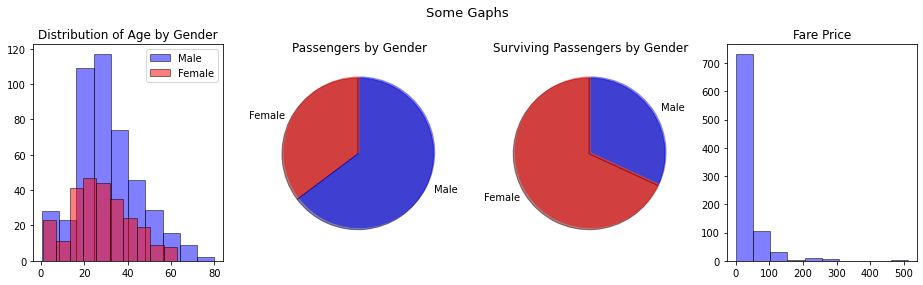

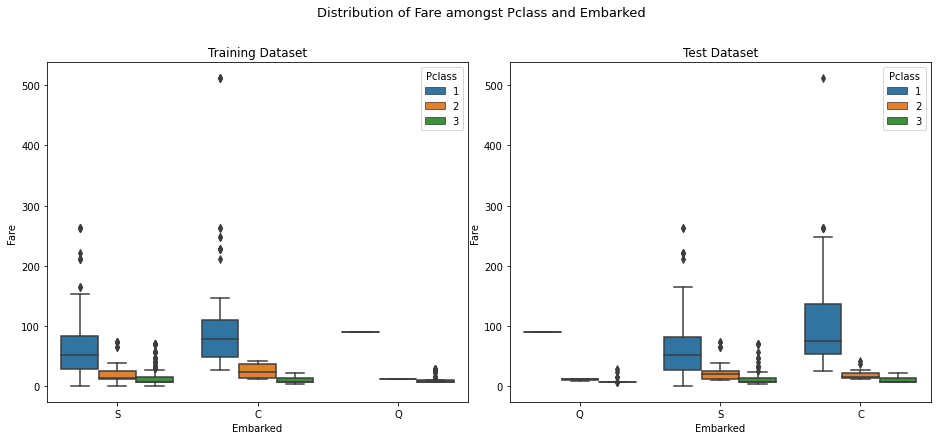

In [9]:
train_df['Sex'] = train_df['Sex'].replace({'male':'Male' , 'female': 'Female'})
test_df['Sex'] = test_df['Sex'].replace({'male':'Male' , 'female': 'Female'})


train_missing = train_df.isnull().sum()/train_df.shape[0]
test_missing = test_df.isnull().sum()/test_df.shape[0]

train_gender = pd.DataFrame(train_df.groupby("Sex", as_index = False).size())
train_survived_by_gender = pd.DataFrame(train_df.groupby("Sex")["Survived"].sum()).reset_index() 


#######################################################################################################################################################

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4 , figsize = (13, 4))

fig.suptitle('Some Gaphs' , fontsize = 13)
fig.tight_layout(h_pad = 15)
 
ax1.hist(train_df[train_df['Sex'] == 'Male']['Age'], color = 'blue', alpha = .5 , label = 'Male', edgecolor = 'black'); 
ax1.hist(train_df[train_df['Sex'] == 'Female']['Age'], color = 'red', alpha = .5, label = 'Female', edgecolor = 'black');  
ax1.set_title('Distribution of Age by Gender' );
ax1.legend()

#ax2.bar(train_gender["Sex"], height = train_gender["size"] , color = 'red', alpha = .5 ,edgecolor = 'black')
ax2.pie(train_gender['size'], labels = train_gender['Sex'], startangle = 90 , shadow = True , colors = ['red', 'blue'], wedgeprops = {"alpha" : .5} )
ax2.set_title('Passengers by Gender' );  
 
#ax3.bar(train_survived_by_gender["Sex"], height = train_survived_by_gender["Survived"] , color = 'blue', alpha = .5 , edgecolor = 'black' )
ax3.pie(train_survived_by_gender["Survived"] , labels = train_survived_by_gender["Sex"], startangle = 90, shadow = True , colors = ['red', 'blue'] , wedgeprops = {"alpha" : .5})
ax3.set_title('Surviving Passengers by Gender' );

ax4.hist(train_df['Fare'], color = 'blue', alpha = .5 , edgecolor = 'black')
ax4.set_title('Fare Price')

plt.subplots_adjust(top=0.85)    
plt.show()    

############################################################################################################


fig, (ax1, ax2) = plt.subplots(1, 2 , figsize = (13, 6))
fig.suptitle('Distribution of Fare amongst Pclass and Embarked' , fontsize = 13)
fig.tight_layout(h_pad = 15)

sns.boxplot( x = "Embarked" , y = "Fare" , hue = "Pclass" , data = train_df , ax = ax1   ) 
ax1.set_title('Training Dataset' ); 

sns.boxplot( x = "Embarked" , y = "Fare" , hue = "Pclass" , data = test_df , ax = ax2) 
ax2.set_title('Test Dataset' ); 
 
plt.subplots_adjust(top=0.85)    
plt.show()  